## Introduction

Let's return to our third example from day 1 of class, with the spiral shaped decision boundary.  The code below simulates a training set and test set, and plots the training data.  Our goal is to recreate the plots of the fitted models' decision boundaries using the parameter estimates, which I have saved.

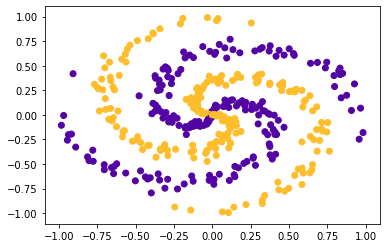

In [34]:
# imports
from urllib.request import urlopen
import pickle
import numpy as np
from scipy.special import expit as sigmoid
import matplotlib.pyplot as plt
from matplotlib import colors

# set seed for reproducibility
np.random.seed(3)

# function to simulate data
def sim_data_ex3(n):
  '''
  A function to randomly generate data with a spiral-shaped decision boundary
  
  Arguments:
   - n: integer sample size per branch of the spiral
  
  Return:
   - (x, y) tuple.  x is a numpy array of shape (4n, 2) with feature values;
     y is a numpy array of shape (4n, 1) with responses (0 or 1)
  '''
  # number of branches
  k = 4

  # initialize data matrix (each row = single example)
  x = np.zeros((n*k, 2))
  y = np.zeros((n*k, 1)) # class labels
  for j in range(k):
    ix = range(n*j,n*(j+1))
    r = np.linspace(0.0,1,n) # radius
    t = np.linspace(j * 2 * 2 * np.pi / k + j * 2 * np.pi / k, (j+1) * 2 * 2 * np.pi / k + (j+1) * 2 * np.pi / k,n) + np.random.randn(n)*0.2 # theta
    x[ix, :] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix, :] = np.mod(j, 2)

  return((x, y))

# simulate training set and make a plot
(train_x, train_y) = sim_data_ex3(n = 100)
fig, ax = plt.subplots()
scatter = ax.scatter(train_x[:, 0], train_x[:, 1], c = train_y[:, 0], norm = plt.Normalize(-0.2, 1.2), cmap = plt.get_cmap('plasma'))
plt.show()

# simulate test set data for model evaluation
(test_x, test_y) = sim_data_ex3(n = 100)
test_x = test_x.T
test_y = test_y.T

## Model 1

Our first model had one hidden layer, with structure as follows:

 * Input layer: $X_1$ and $X_2$
 * Hidden layer: 20 hidden units and a tanh activation function
 * Output layer: 1 unit and a sigmoid activation function

The code below loads the parameter estimates for this model and sets up a grid of points at which we will make predictions.  Predictions at these points will form the background of a plot like the one below, showing the decision boundary:

![boundaries 1](https://raw.githubusercontent.com/mhc-stat344ne-s2020/lab02/master/nnet_model1_boundaries.png)

In [0]:
# load model parameter estimates
nnet_model1_fits = pickle.load(urlopen('https://github.com/mhc-stat344ne-s2020/lab02/blob/master/nnet_model1_estimates.pkl?raw=true'))
b1 = nnet_model1_fits['b1']
w1 = nnet_model1_fits['w1'].T
b2 = nnet_model1_fits['b2']
w2 = nnet_model1_fits['w2'].T

# set up grid of test points at which to make predictions, for background of plot
xlim = [-1,1]
gridlen = 101
dx = (xlim[1] - xlim[0])/gridlen
background_x0, background_x1 = np.mgrid[slice(xlim[0], xlim[1] + dx, dx), slice(xlim[0], xlim[1] + dx, dx)]
background_x0_long = background_x0[0:gridlen,0:gridlen].reshape((1, gridlen**2))
background_x1_long = background_x1[0:gridlen,0:gridlen].reshape((1, gridlen**2))
background_x = np.concatenate((background_x0_long, background_x1_long), axis = 0)

#### 1. What are the shapes of b1, w1, b2, and w2?  Try to answer first by thinking about the number of units in each layer of the neural network.  Then verify your guesses by checking the shapes of the arrays.

In [36]:
print(b1.shape)
print(w1.shape)
print(b2.shape)
print(w2.shape)

(20, 1)
(20, 2)
(1, 1)
(1, 20)


#### 2. In the cell below, add code to compute the forward propagation for this model.

* Your inputs to the calculation are in the array `backround_x` of points at which we want to find predicted values
* The `np.tanh` function can be used to calculate a tanh activation
* We have imported the `expit` function from the scipy package as `sigmoid`, so you can just call `sigmoid` to compute the sigmoid activation.

In [0]:
z1 = b1 + np.dot(w1, background_x) # Replace None to the left by a calculation of the z matrix for the first layer
a1 = np.tanh(z1) # Replace None to the left by a calculation of the a matrix for the first layer
z2 = b2 + np.dot(w2, a1) # Replace None to the left by a calculation of the z matrix for the first layer
a2 = sigmoid(z2) # Replace None to the left by a calculation of the a matrix for the first layer
yhat_lgl = (a2 >= 0.5) # Replace None to the left by a calculation of a logical vector of y hats (by comparing a2 to 0.5)
yhat = yhat_lgl.astype(int) # Replace None to the left by a conversion of data type to int

#### 3. Run the code below to generate a plot of the decision boundary.  Your result should look similar to the plot above.

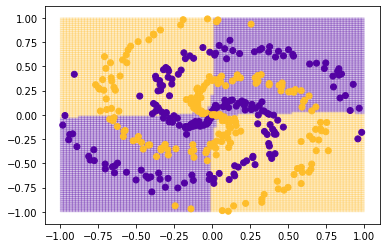

In [38]:
yhat_square = yhat.reshape((gridlen, gridlen))

fig, ax = plt.subplots()
im = ax.pcolormesh(background_x0, background_x1, yhat_square, norm = plt.Normalize(-0.2, 1.2), cmap = plt.get_cmap('plasma'), alpha = 0.2, edgecolors = 'none', antialiased = True)
im = ax.scatter(train_x[:, 0], train_x[:, 1], c = train_y[:, 0], norm = plt.Normalize(-0.2, 1.2), cmap = plt.get_cmap('plasma'))
plt.show()

## Model 2

Our first model had one hidden layer, with structure as follows:

 * Input layer: $X_1$ and $X_2$
 * Hidden layer 1: 20 hidden units and a tanh activation function
 * Hidden layer 2: 20 hidden units and a tanh activation function
 * Output layer: 1 unit and a sigmoid activation function

The code below loads the parameter estimates for this model and sets up a grid of points at which we will make predictions.  Predictions at these points will form the background of a plot like the one below, showing the decision boundary:

![boundaries 2](https://raw.githubusercontent.com/mhc-stat344ne-s2020/lab02/master/nnet_model2_boundaries.png)

In [0]:
# load model parameter estimates
nnet_model2_fits = pickle.load(urlopen('https://github.com/mhc-stat344ne-s2020/lab02/blob/master/nnet_model2_estimates.pkl?raw=true'))
b1 = nnet_model2_fits['b1']
w1 = nnet_model2_fits['w1'].T
b2 = nnet_model2_fits['b2']
w2 = nnet_model2_fits['w2'].T
b3 = nnet_model2_fits['b3']
w3 = nnet_model2_fits['w3'].T

#### 4. What are the shapes of b1, w1, b2, w2, b3, and w3?  Try to answer first by thinking about the number of units in each layer of the neural network.  Then verify your guesses by checking the shapes of the arrays.

In [40]:
print(b1.shape)
print(w1.shape)
print(b2.shape)
print(w2.shape)
print(b3.shape)
print(w3.shape)

(20, 1)
(20, 2)
(20, 1)
(20, 20)
(1, 1)
(1, 20)


#### 5. In the cell below, add code to compute the forward propagation for this model.

* Your inputs to the calculation are in the array `backround_x` of points at which we want to find predicted values
* The `np.tanh` function can be used to calculate a tanh activation
* We have imported the `expit` function from the scipy package as `sigmoid`, so you can just call `sigmoid` to compute the sigmoid activation.

In [0]:
z1 = b1 + np.dot(w1, background_x) # Replace None to the left by a calculation of the z matrix for the first layer
a1 = np.tanh(z1) # Replace None to the left by a calculation of the a matrix for the first layer
z2 = b2 + np.dot(w2, a1) # Replace None to the left by a calculation of the z matrix for the second layer
a2 = np.tanh(z2) # Replace None to the left by a calculation of the a matrix for the second layer
z3 = b3 + np.dot(w3, a2) # Replace None to the left by a calculation of the z matrix for the third layer
a3 = sigmoid(z3) # Replace None to the left by a calculation of the a matrix for the third layer
yhat_lgl = (a3 >= 0.5) # Replace None to the left by a calculation of a logical vector of y hats (by comparing a2 to 0.5)
yhat = yhat_lgl.astype(int) # Replace None to the left by a conversion of data type to int

#### 6. Run the code below to generate a plot of the decision boundary.  Your result should look similar to the plot above.

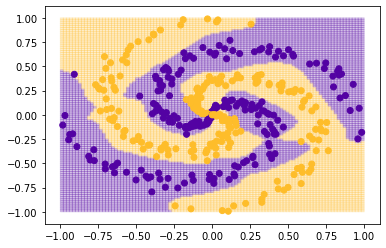

In [42]:
yhat_square = yhat.reshape((gridlen, gridlen))

fig, ax = plt.subplots()
im = ax.pcolormesh(background_x0, background_x1, yhat_square, norm = plt.Normalize(-0.2, 1.2), cmap = plt.get_cmap('plasma'), alpha = 0.2, edgecolors = 'none', antialiased = True)
im = ax.scatter(train_x[:, 0], train_x[:, 1], c = train_y[:, 0], norm = plt.Normalize(-0.2, 1.2), cmap = plt.get_cmap('plasma'))
plt.show()